In [1]:
# Calcula la exposición al cambio climático de los migrantes

# Importamos librerías
import numpy as np
import pandas as pd
import geopandas as gpd
import geoviews as gv


# Data & functions

In [2]:
# Parámetros de mapas
gv.extension("matplotlib")
def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.9*b, w, 0.05*h])
options = { "colorbar": True, "linewidth": 0.4,
    "hooks": [hook], "ylim":(-62,85), "xlim":(-180,180),
    "colorbar_opts": {"orientation": "horizontal"} }
options_m = { "bgcolor": "lightgray", "fontscale": 2, "aspect": 2.25 }

# Parámetros de visualización de tablas
pd.options.display.float_format = '{:,.1f}'.format

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [3]:
# Códigos nacionales
ix  = "ISO_A3"

# Mapa
borders_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_admin_0_countries_mod" )
borders = gpd.read_file(borders_path).drop(
    columns = [ix] ).set_index("ISO_A3_EH")
borders.index.name = ix
borders = borders[ borders["ISO_N3_EH"] != "-99" ]
borders = borders[ ~borders.index.duplicated() ]

# Océano
ocean_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_ocean" )
ocean = gv.Polygons( gpd.read_file(ocean_path), vdims = "min_zoom"
    ).opts( linewidth = 0, cmap = "Paired")

In [4]:
# Funciones a utilizar

# Mejora el formato de las tablas para su uso en documentos.
def display(df, vn, var_i = None, p = False, format = ["{:.1f}"],
    category = "", type = "category", add = False):
    # variables
    # df:       dataframe que contiene los datos
    # vn:       variable principal
    # var_i:    conjunto de variables secundarias, solo si type = "index"
    # p:        indica si la variable es positiva
    # format:   formato a usar, se pasa como un solo datos si
    #           type = "category" y como una
    #           lista por cada columna si type = "index"
    # category: nombre de la categoría, solo si type = "category"
    # type:     tipo de tabla a crear
    #           "index":    Resumen de variables
    #           "category": Una variable principal
    # add:      indica si sumar (True) o promediar (False) cada columna,
    #           se pasa como un solo datos si type = "category" y como una
    #           lista por cada columna si type = "index"
    #
    # regresa
    # disp:     Objeto Display de Pandas o un Dataframe
    #           de pandas basado en la tabla de entrada

    # Escogemos los 5 países más altos y otros más para formar la tabla
    # Resumen de variables
    if   type == "index":
        disp = df.loc[ df[vn].notnull(),
            ["name", vn] + var_i ].sort_values(
            vn, ascending = p ).reset_index(drop = True).head(15).copy()
    # Una variable principal
    elif type == "category":
        disp = df.loc[ df[vn].notnull(), ["name", vn] ].sort_values(
            vn, ascending = p ).reset_index(drop = True).head(15).copy()
    c_list = list( disp[ ["name", vn]
        ].sort_values(vn, ascending = p).head(5)["name"].values )
    print(f"Most vulnerable countries: {', '.join(c_list)}")

    # Renombramos columnas
    # Resumen de variables
    if   type == "index":
        cols = ["Name", vn] + var_i
    # Una variable principal
    elif type == "category":
        cols = [ "Name", f"{category}" ]
    disp.columns = cols

    # Categorías geopolíticas y geográficas
    cats = [ "", "", "", "", "", "", "SIDS", "LDC", "LLDC",
        "Asia", "Europe", "Africa", "Oceania", "Americas" ]
    # Iteramos para cada categoría geopolítica
    for r, cat in enumerate(cats[:9]):
        if r in range(0, 6): pass
        else:
            disp.iloc[r, 0] = cat
            # Resumen de variables
            if   type == "index":
                # Sumamos o promediamos según sea el caso
                for i, c in enumerate(cols[1:]):
                    if add[i]: disp.iloc[r, i+1] = df.loc[ df[cat], c ].sum()
                    else:      disp.iloc[r, i+1] = df.loc[ df[cat], c ].mean()
            # Una variable principal
            elif type == "category":
                # Sumamos la columna
                if add: disp.iloc[r, 1] = df.loc[df[cat], vn].sum()
                # Promediamos la columna
                else  : disp.iloc[r, 1] = df.loc[df[cat], vn].mean()
            c_list = list( df.loc[df[cat], ["name", vn]
                ].sort_values( vn, ascending = p
                ).head(5)["name"].values )
            print(f"Most vulnerable {cat}: {', '.join(c_list)}")

    # Iteramos para cada categoría geográfica
    for r, cat in enumerate(cats):
        if r in range(0, 9): pass
        else:
            disp.iloc[r, 0] = cat
            # Resumen de variables
            if   type == "index":
                # Sumamos o promediamos según sea el caso
                for i, c in enumerate(cols[1:]):
                    if add[i]:
                        disp.iloc[r, i+1] = df.loc[
                            df["region"] == cat, c ].sum()
                    else     :
                        disp.iloc[r, i+1] = df.loc[
                            df["region"] == cat, c ].mean()
            # Una variable principal
            elif type == "category":
                # Sumamos la columna
                if add:
                    disp.iloc[r, 1] = df.loc[df["region"] == cat, vn].sum()
                # Promediamos la columna
                else  :
                    disp.iloc[r, 1] = df.loc[df["region"] == cat, vn].mean()

    # Total mundial
    cat = "World"
    r = 14
    disp.iloc[r, 0] = cat
    # Resumen de variables
    if   type == "index":
        # Sumamos o promediamos según sea el caso
        for i, c in enumerate(cols[1:]):
            if add[i]: disp.iloc[r, i+1] = df[c].sum()
            else     : disp.iloc[r, i+1] = df[c].mean()
    # Una variable principal
    elif type == "category":
        # Sumamos la columna
        if add: disp.iloc[r, 1] = df[vn].sum()
        # Promediamos la columna
        else  : disp.iloc[r, 1] = df[vn].mean()

    # Damos formato
    # Resumen de variables
    if   type == "index":
        # Pasamos la tabla sin formato
        disp = disp.style.format( dict(zip(cols[1:], format)) )
        # Una variable principal
    elif type == "category":
        disp = disp.style.format( { cols[1]: format } )

    # Regresamos la tabla
    return disp

# Climate exposure

In [5]:
# Códigos nacionales
ix  = "ISO_A3"
# Carpetas
path_r = "../share/Indexes/"
# Índices climáticos y socioeconómicos
df_c = pd.read_csv(path_r + "climate_index.csv", index_col = ix)
cols = [df_c.columns[5]] + list(df_c.columns[0:5])

# Tabla base
iso = "../../Bases_de_datos/Country_ISO_code.csv"
df_iso = pd.read_csv(iso).set_index("alpha-3")
df_iso.index.name = ix

# Datos de migración
df = pd.read_csv("../../Bases_de_datos/Migration/bilat_mig_sex_type.csv")
df = df[ (df["year0"]==2015) & (df["type"]=="outward") ]
df = df.set_index("orig").join( df_c[cols] ).reset_index()
df = df.set_index("dest").join( df_c[cols], lsuffix = ", origin",
    rsuffix = ", destination" ).reset_index()

# Calculamos el cambio de exposición
orig_i = [ f"{x}, origin"      for x in cols ]
dest_i = [ f"{x}, destination" for x in cols ]
diff_i = [ f"{x}, difference"  for x in cols ]
weig_i = [ f"{x}, weighted"    for x in cols ]
df[diff_i] = - ( df[dest_i].values - df[orig_i].values )
df[weig_i] = df[diff_i] * df[["da_pb_closed"]].values

# Datos por país desde el origen
df_orig = df_iso.copy()
df_orig["Emigrants"] = df[["orig", "da_pb_closed"]].groupby("orig").sum()
df_orig[cols] = df[["orig"] + weig_i].groupby("orig").sum()
df_orig[cols] = ( df_orig[cols] / df_orig[["Emigrants"]].values )

# Datos por país desde el destino
df_dest = df_iso.copy()
df_dest["Immigrants"] = df[["dest", "da_pb_closed"]].groupby("dest").sum()
df_dest[cols] = df[["dest"] + weig_i].groupby("dest").sum()
df_dest[cols] = ( df_dest[cols] / df_dest[["Immigrants"]].values )

min: 86.18, max: 5695009.08


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Emigrants)
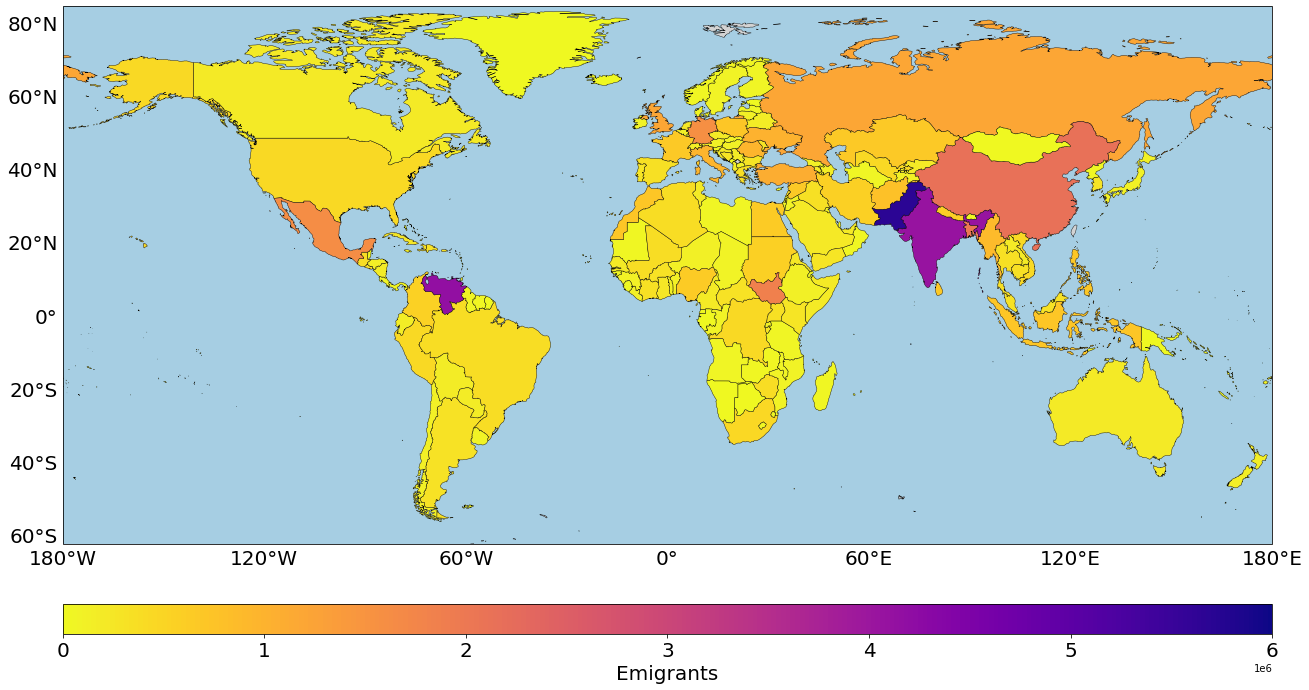

min: -4.736305785713034, max: 5.2839248761453685


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Climate change exposure index)
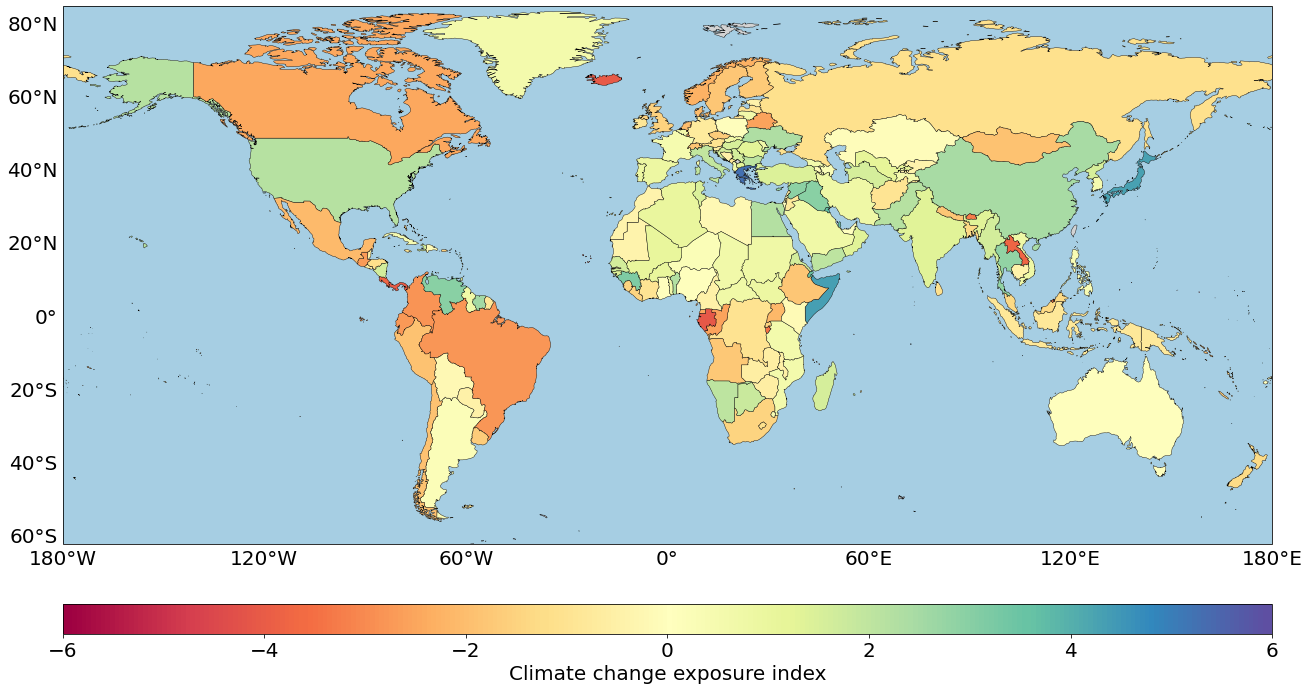

min: 53.72, max: 10282760.95


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Immigrants)
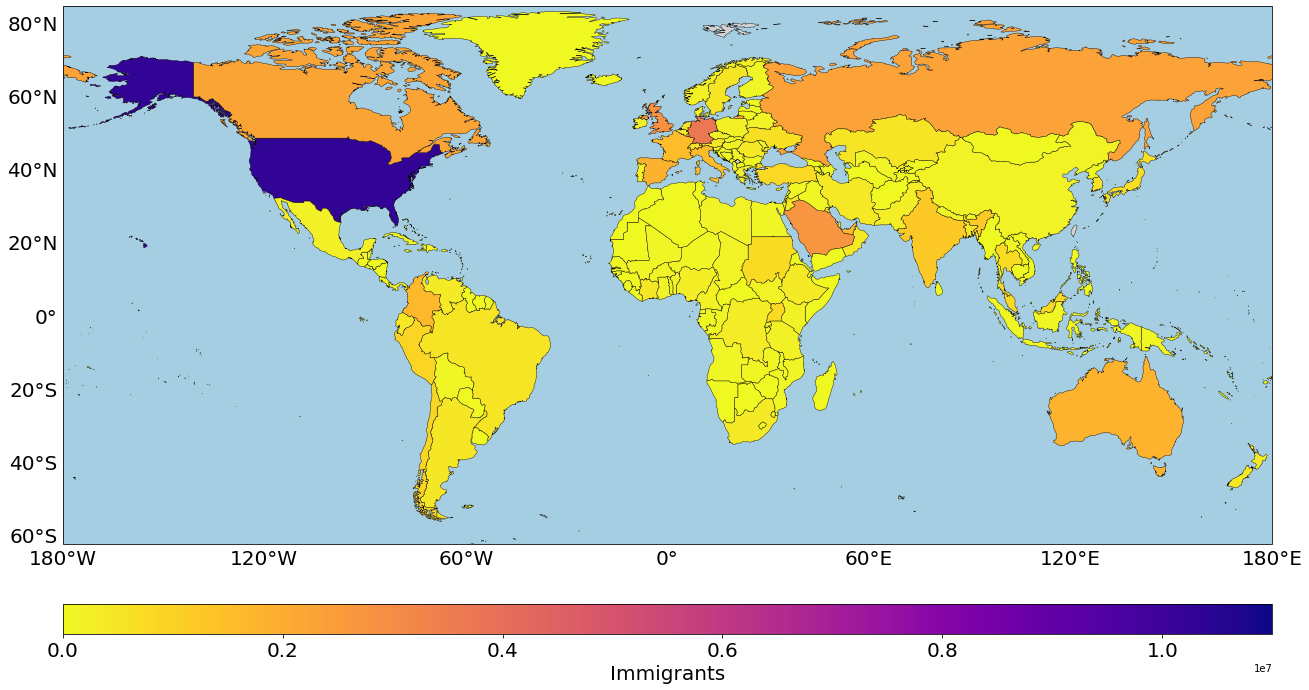

min: -3.9279655013839245, max: 4.929140717063137


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Climate change exposure index)
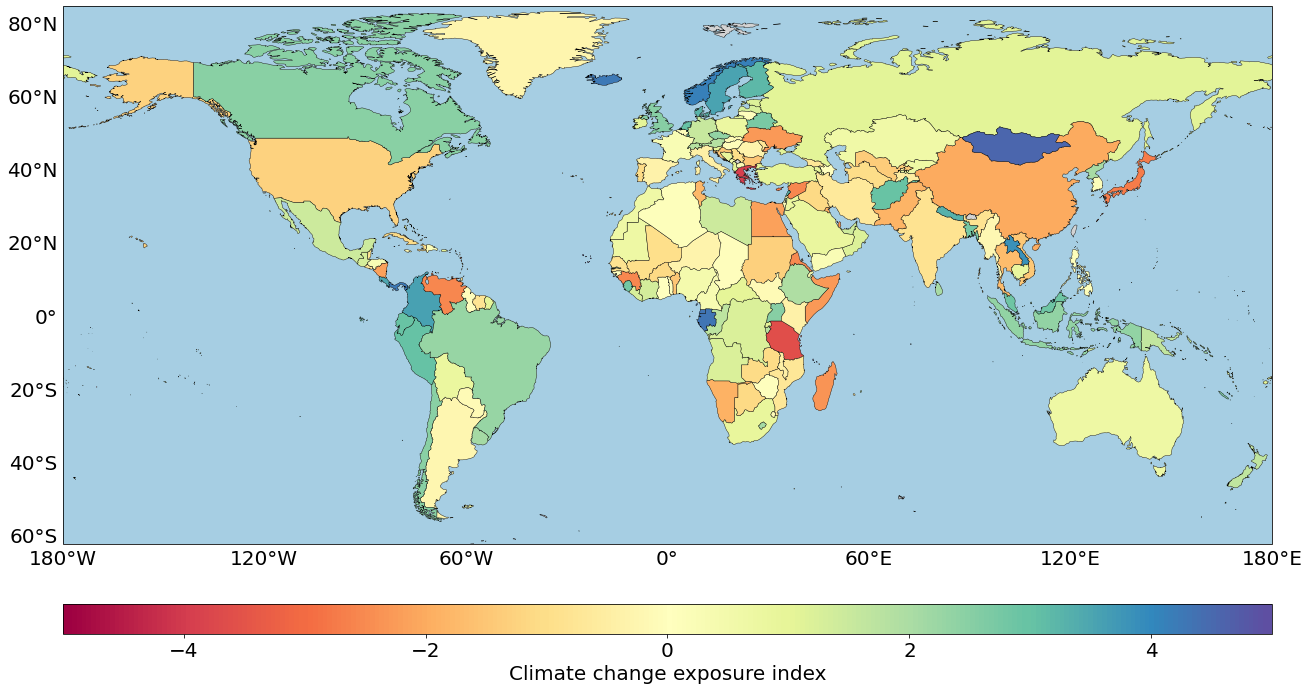

In [6]:
# Mapas

# Emigrantes
vn = "Emigrants"
borders[vn] = df_orig[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = 0
max = 6e6
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Cambio de exposición, origen
vn = df_orig.columns[-6]
borders[vn] = df_orig[vn]
borders.loc[["MHL"], vn] = np.nan
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = -6
max = 6
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "spectral", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Emigrantes
vn = "Immigrants"
borders[vn] = df_dest[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = 0
max = 11e6
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Cambio de exposición, destino
vn = df_dest.columns[-6]
borders[vn] = df_dest[vn]
borders.loc[["MHL", "BTN", "MDV"], vn] = np.nan
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = -5
max = 5
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "spectral", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

In [7]:
# Resumen por países, origen
disp = display(df_orig, df_orig.columns[-7],
    var_i = list(df_orig.columns[-6:]), p = False, type = "index",
    add = [True] + [False] * 6, format = ["{:,.0f}"] + ["{:,.1f}"]*6)
disp

Most vulnerable countries: Pakistan, Venezuela (Bolivarian Republic of), India, China, Bangladesh
Most vulnerable SIDS: Haiti, Dominican Republic, Puerto Rico, Cuba, Jamaica
Most vulnerable LDC: Bangladesh, South Sudan, Myanmar, Afghanistan, Nepal
Most vulnerable LLDC: South Sudan, Afghanistan, Kazakhstan, Nepal, Uzbekistan


,Name,Emigrants,Climate change exposure index,Sea level rise exposure index,Drought exposure index,Extreme heat exposure index,Extreme rainfall exposure index,Hurricane exposure index
0,Pakistan,"5,695,009",2.2,3.3,-0.7,2.8,1.1,-0.2
1,Venezuela (Bolivarian Republic of),"4,152,554",3.0,-0.9,7.6,4.2,-2.9,0.6
2,India,"4,066,864",1.3,3.8,-0.7,2.1,-1.8,0.4
3,China,"2,149,366",2.5,4.0,-1.1,3.0,2.9,-1.9
4,Bangladesh,"1,995,753",-1.3,2.1,-0.6,0.5,-6.9,1.2
5,South Sudan,"1,856,705",0.9,-0.5,-0.1,3.3,-0.3,-0.0
6,SIDS,"1,980,089",-0.3,0.5,1.4,-2.1,-3.2,2.4
7,LDC,"11,916,969",-0.2,-0.3,-0.8,0.9,-0.4,-0.0
8,LLDC,"8,602,367",-0.4,-2.4,-0.4,1.3,0.6,-0.2
9,Asia,"27,133,806",0.5,0.5,-0.4,1.1,-0.2,0.3


In [8]:
# Países con mayor mejoría en exposición, origen
df_orig[ ["name"] + list(df_orig.columns[-7:]) ].sort_values(
    df_orig.columns[-6], ascending = False ).head(10).style.format(
    dict(zip(df_orig.columns[-7:], ["{:,.0f}"] + ["{:,.1f}"]*6)) )

,name,Emigrants,Climate change exposure index,Sea level rise exposure index,Drought exposure index,Extreme heat exposure index,Extreme rainfall exposure index,Hurricane exposure index
ISO_A3,,,,,,,,
GRC,Greece,"341,041",5.3,4.6,4.8,4.3,1.6,-0.2
BHR,Bahrain,"40,271",5.0,5.2,-2.3,5.0,6.9,-0.8
SOM,Somalia,"209,673",4.3,6.2,-0.9,4.3,2.9,-0.2
JPN,Japan,"98,476",4.3,5.6,-1.2,-1.7,1.8,7.6
CYM,Cayman Islands,214,4.2,6.9,-2.0,-0.8,0.5,7.4
WLF,Wallis and Futuna,"1,445",3.9,9.4,-0.6,-0.0,1.6,0.7
QAT,Qatar,"36,040",3.7,6.9,-4.2,1.7,6.3,-0.2
KWT,Kuwait,"75,014",3.7,8.0,-2.1,1.6,3.6,-0.6
DJI,Djibouti,"4,325",3.5,4.2,-3.3,5.0,4.2,-0.1


In [9]:
# Resumen por países, destino
disp = display(df_dest, df_dest.columns[-7],
    var_i = list(df_dest.columns[-6:]), p = False, type = "index",
    add = [True] + [False] * 6, format = ["{:,.0f}"] + ["{:,.1f}"]*6)
disp

Most vulnerable countries: United States of America, Germany, United Kingdom of Great Britain and Northern Ireland, Saudi Arabia, Russian Federation
Most vulnerable SIDS: Singapore, Dominican Republic, Papua New Guinea, Maldives, Puerto Rico
Most vulnerable LDC: Uganda, Sudan, Bangladesh, Ethiopia, Congo, Democratic Republic of the
Most vulnerable LLDC: Uganda, Kazakhstan, Ethiopia, Chad, South Sudan


,Name,Immigrants,Climate change exposure index,Sea level rise exposure index,Drought exposure index,Extreme heat exposure index,Extreme rainfall exposure index,Hurricane exposure index
0,United States of America,"10,282,761",-1.3,-1.0,2.4,-0.4,-4.9,0.4
1,Germany,"3,679,840",1.6,-1.8,2.8,3.0,0.2,0.1
2,United Kingdom of Great Britain and Northern Ireland,"2,857,616",2.5,2.5,-0.0,5.2,-1.1,0.6
3,Saudi Arabia,"2,748,848",0.8,5.6,0.5,-0.8,-3.7,0.7
4,Russian Federation,"2,358,910",1.1,-0.6,1.3,2.0,0.3,0.0
5,Canada,"2,275,029",2.5,4.5,1.6,3.4,-3.2,0.6
6,SIDS,"941,127",0.5,-0.0,-0.5,2.3,1.6,-2.2
7,LDC,"4,654,270",0.6,0.7,-0.1,0.4,0.8,-0.0
8,LLDC,"3,208,739",0.8,2.4,0.1,-0.2,-0.4,0.2
9,Asia,"15,826,709",0.7,1.3,-0.2,0.7,0.4,-0.3


In [10]:
# Países con mayor mejoría en exposición, destino
df_dest[ ["name"] + list(df_dest.columns[-7:]) ].sort_values(
    df_dest.columns[-6], ascending = False ).head(10).style.format(
    dict(zip(df_dest.columns[-7:], ["{:,.0f}"] + ["{:,.1f}"]*6)) )

,name,Immigrants,Climate change exposure index,Sea level rise exposure index,Drought exposure index,Extreme heat exposure index,Extreme rainfall exposure index,Hurricane exposure index
ISO_A3,,,,,,,,
BTN,Bhutan,"9,133",6.1,6.6,0.0,7.0,2.7,1.2
MHL,Marshall Islands,374,5.1,3.1,0.1,3.3,5.1,2.7
CPV,Cabo Verde,"3,125",4.9,3.3,0.0,6.6,3.9,0.1
COM,Comoros,"1,752",4.8,1.7,1.6,3.1,4.1,3.1
MNG,Mongolia,"12,076",4.6,7.2,0.3,2.7,0.2,2.5
GNQ,Equatorial Guinea,"9,211",4.3,2.4,3.8,2.8,3.4,0.0
GAB,Gabon,"108,134",4.3,2.4,0.5,6.2,3.2,0.0
ISL,Iceland,"26,875",4.3,3.2,1.4,2.4,4.9,0.3
PAN,Panama,"117,941",4.2,0.7,7.5,4.0,-1.2,1.1


# Climate exposure, female

In [11]:
# Códigos nacionales
ix  = "ISO_A3"
# Carpetas
path_r = "../share/Indexes/"
# Índices climáticos y socioeconómicos
df_c = pd.read_csv(path_r + "climate_index.csv", index_col = ix)
cols = [df_c.columns[5]] + list(df_c.columns[0:5])

# Tabla base
iso = "../../Bases_de_datos/Country_ISO_code.csv"
df_iso = pd.read_csv(iso).set_index("alpha-3")
df_iso.index.name = ix

# Datos de migración
df = pd.read_csv("../../Bases_de_datos/Migration/bilat_mig_sex_type.csv")
df = df[(df["year0"]==2015) & (df["type"]=="outward") & (df["sex"]=="female")]
df = df.set_index("orig").join( df_c[cols] ).reset_index()
df = df.set_index("dest").join( df_c[cols], lsuffix = ", origin",
    rsuffix = ", destination" ).reset_index()

# Calculamos el cambio de exposición
orig_i = [ f"{x}, origin"      for x in cols ]
dest_i = [ f"{x}, destination" for x in cols ]
diff_i = [ f"{x}, difference"  for x in cols ]
weig_i = [ f"{x}, weighted"    for x in cols ]
df[diff_i] = - ( df[dest_i].values - df[orig_i].values )
df[weig_i] = df[diff_i] * df[["da_pb_closed"]].values

# Datos por país desde el origen
df_orig = df_iso.copy()
df_orig["Emigrants"] = df[["orig", "da_pb_closed"]].groupby("orig").sum()
df_orig[cols] = df[["orig"] + weig_i].groupby("orig").sum()
df_orig[cols] = ( df_orig[cols] / df_orig[["Emigrants"]].values )

# Datos por país desde el destino
df_dest = df_iso.copy()
df_dest["Immigrants"] = df[["dest", "da_pb_closed"]].groupby("dest").sum()
df_dest[cols] = df[["dest"] + weig_i].groupby("dest").sum()
df_dest[cols] = ( df_dest[cols] / df_dest[["Immigrants"]].values )

min: -4.710252817227977, max: 5.201083487280915


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Climate change exposure index)
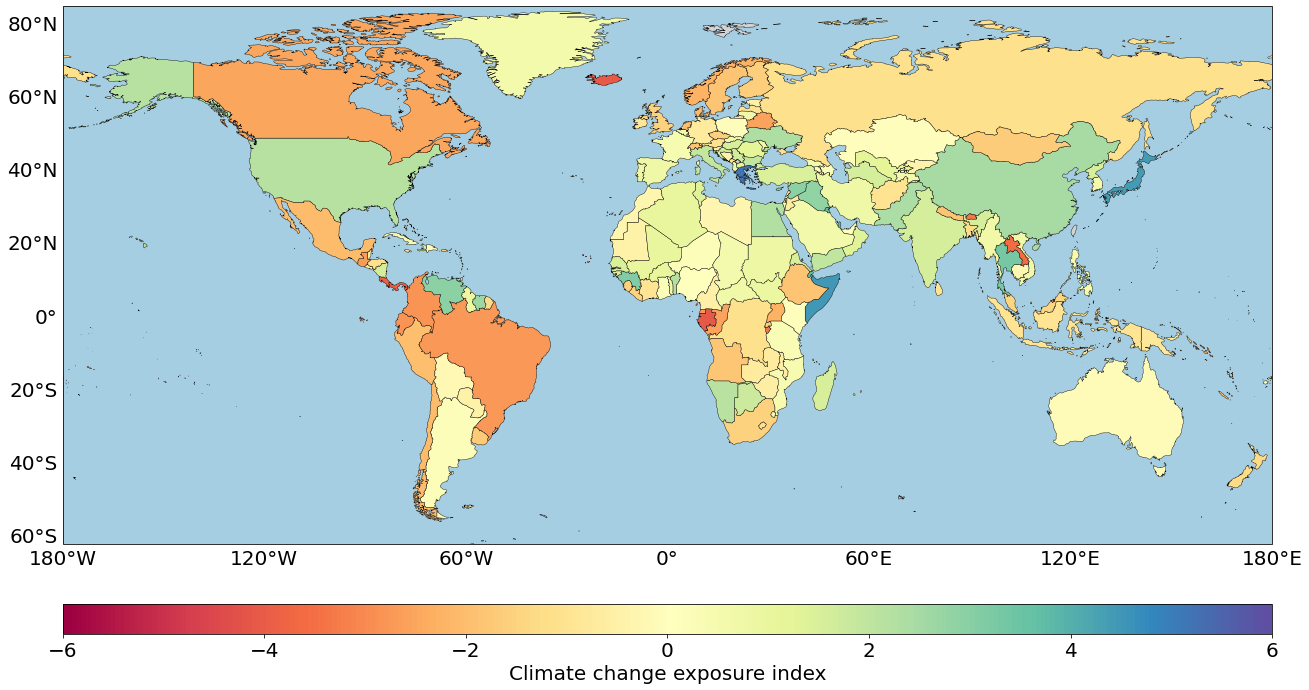

min: -3.8870608085186977, max: 4.886355056147479


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Climate change exposure index)
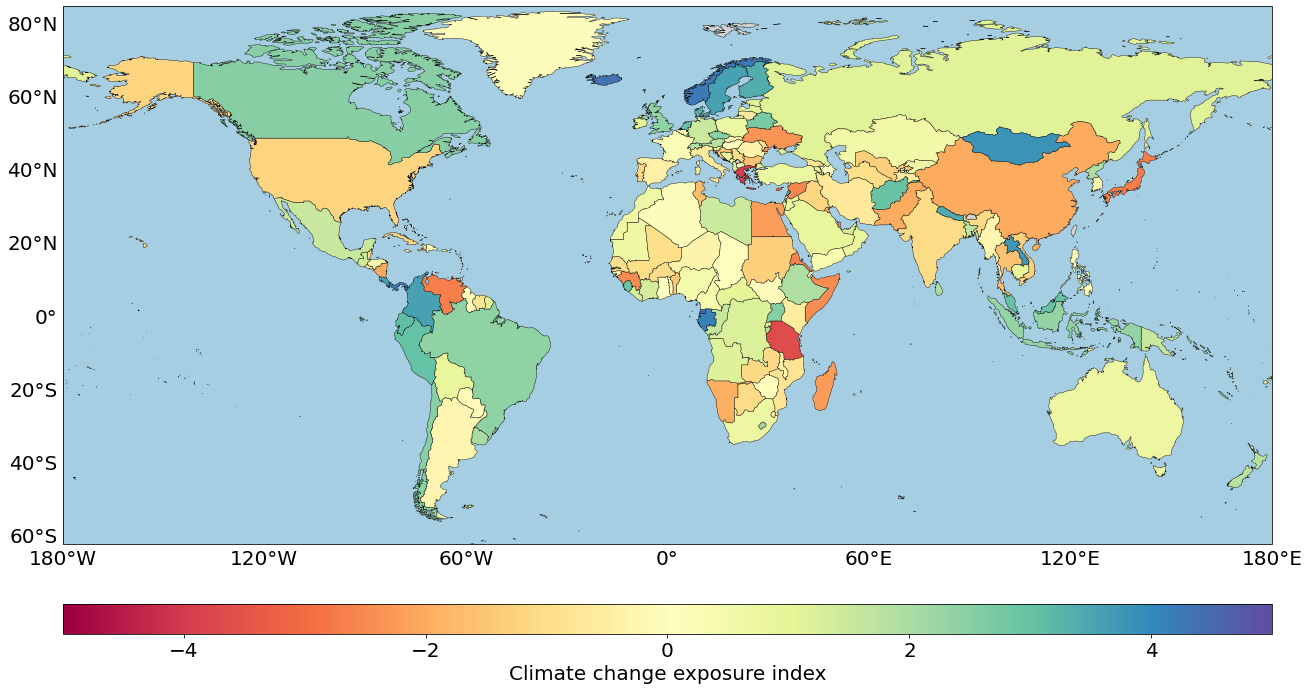

In [12]:
# Mapas

# Cambio de exposición, origen
vn = df_orig.columns[-6]
borders[vn] = df_orig[vn]
borders.loc[["MHL"], vn] = np.nan
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = -6
max = 6
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "spectral", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Cambio de exposición, destino
vn = df_dest.columns[-6]
borders[vn] = df_dest[vn]
borders.loc[["MHL", "BTN", "MDV"], vn] = np.nan
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = -5
max = 5
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "spectral", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

In [13]:
# Resumen por países, origen
disp = display(df_orig, df_orig.columns[-7],
    var_i = list(df_orig.columns[-6:]), p = False, type = "index",
    add = [True] + [False] * 6, format = ["{:,.0f}"] + ["{:,.1f}"]*6)
disp

Most vulnerable countries: Venezuela (Bolivarian Republic of), Pakistan, India, China, South Sudan
Most vulnerable SIDS: Dominican Republic, Haiti, Puerto Rico, Cuba, Jamaica
Most vulnerable LDC: South Sudan, Bangladesh, Myanmar, Afghanistan, Sudan
Most vulnerable LLDC: South Sudan, Afghanistan, Kazakhstan, Nepal, Uganda


,Name,Emigrants,Climate change exposure index,Sea level rise exposure index,Drought exposure index,Extreme heat exposure index,Extreme rainfall exposure index,Hurricane exposure index
0,Venezuela (Bolivarian Republic of),"2,096,763",2.9,-1.0,7.5,4.2,-3.0,0.6
1,Pakistan,"1,815,820",2.4,3.0,-0.7,3.4,1.5,-0.4
2,India,"1,771,848",1.6,3.8,-0.8,2.6,-1.4,0.2
3,China,"1,193,820",2.4,4.0,-1.1,3.1,3.0,-2.0
4,South Sudan,"943,011",0.9,-0.5,-0.1,3.3,-0.2,-0.0
5,Mexico,"801,314",-2.0,-3.9,2.7,0.5,-7.5,2.4
6,SIDS,"1,029,023",-0.3,0.5,1.4,-2.1,-3.2,2.4
7,LDC,"5,464,973",-0.2,-0.4,-0.7,0.9,-0.4,-0.1
8,LLDC,"4,203,119",-0.4,-2.4,-0.4,1.3,0.6,-0.2
9,Asia,"11,937,982",0.5,0.5,-0.4,1.2,-0.1,0.3


In [14]:
# Países con mayor mejoría en exposición, origen
df_orig[ ["name"] + list(df_orig.columns[-7:]) ].sort_values(
    df_orig.columns[-6], ascending = False ).head(10).style.format(
    dict(zip(df_orig.columns[-7:], ["{:,.0f}"] + ["{:,.1f}"]*6)) )

,name,Emigrants,Climate change exposure index,Sea level rise exposure index,Drought exposure index,Extreme heat exposure index,Extreme rainfall exposure index,Hurricane exposure index
ISO_A3,,,,,,,,
GRC,Greece,"158,387",5.2,4.5,4.7,4.1,1.7,-0.2
BHR,Bahrain,"22,023",4.9,4.3,-1.6,4.8,7.7,-1.1
SOM,Somalia,"100,994",4.5,6.2,-0.7,4.6,2.8,-0.2
JPN,Japan,"53,455",4.4,5.7,-1.3,-1.4,1.8,7.7
CYM,Cayman Islands,117,4.3,6.9,-2.0,-0.7,0.4,7.5
WLF,Wallis and Futuna,719,3.9,9.4,-0.6,-0.0,1.6,0.7
QAT,Qatar,"6,468",3.7,6.9,-4.2,1.9,6.2,-0.3
KWT,Kuwait,"43,552",3.7,8.0,-1.9,1.6,3.5,-0.7
DJI,Djibouti,"2,221",3.5,4.1,-3.2,5.2,4.1,-0.1


In [15]:
# Resumen por países, destino
disp = display(df_dest, df_dest.columns[-7],
    var_i = list(df_dest.columns[-6:]), p = False, type = "index",
    add = [True] + [False] * 6, format = ["{:,.0f}"] + ["{:,.1f}"]*6)
disp

Most vulnerable countries: United States of America, Germany, United Kingdom of Great Britain and Northern Ireland, Russian Federation, Canada
Most vulnerable SIDS: Singapore, Dominican Republic, Papua New Guinea, Puerto Rico, Trinidad and Tobago
Most vulnerable LDC: Uganda, Sudan, Ethiopia, Congo, Democratic Republic of the, Bangladesh
Most vulnerable LLDC: Uganda, Kazakhstan, Ethiopia, South Sudan, Chad


,Name,Immigrants,Climate change exposure index,Sea level rise exposure index,Drought exposure index,Extreme heat exposure index,Extreme rainfall exposure index,Hurricane exposure index
0,United States of America,"5,168,924",-1.2,-1.0,2.3,-0.4,-4.9,0.4
1,Germany,"1,826,939",1.5,-1.8,2.8,3.0,0.2,0.2
2,United Kingdom of Great Britain and Northern Ireland,"1,435,154",2.4,2.4,-0.1,5.0,-1.1,0.6
3,Russian Federation,"1,196,221",1.1,-0.5,1.5,1.9,0.2,0.0
4,Canada,"1,174,542",2.5,4.6,1.6,3.4,-3.2,0.7
5,Spain,"991,912",-0.4,-0.3,-3.6,-1.2,3.2,0.7
6,SIDS,"460,515",0.5,0.0,-0.5,2.4,1.7,-2.2
7,LDC,"2,249,861",0.6,0.7,-0.2,0.4,0.8,-0.0
8,LLDC,"1,658,379",0.8,2.4,0.1,-0.2,-0.4,0.2
9,Asia,"6,338,587",0.6,1.2,-0.1,0.6,0.3,-0.3


In [16]:
# Resumen por países, destino
df_dest[ ["name"] + list(df_dest.columns[-7:]) ].sort_values(
    df_dest.columns[-6], ascending = False ).head(10).style.format(
    dict(zip(df_dest.columns[-7:], ["{:,.0f}"] + ["{:,.1f}"]*6)) )

,name,Immigrants,Climate change exposure index,Sea level rise exposure index,Drought exposure index,Extreme heat exposure index,Extreme rainfall exposure index,Hurricane exposure index
ISO_A3,,,,,,,,
BTN,Bhutan,"1,809",6.1,6.5,0.0,6.9,2.6,1.2
MHL,Marshall Islands,121,5.5,3.5,0.1,4.0,4.7,3.4
MDV,Maldives,"9,121",5.2,6.1,0.1,6.5,0.9,1.1
CPV,Cabo Verde,"1,636",4.9,3.2,-0.1,6.7,4.0,0.1
COM,Comoros,910,4.8,1.8,1.6,3.2,4.0,3.1
GNQ,Equatorial Guinea,"3,476",4.5,2.6,4.0,2.6,3.5,0.0
ISL,Iceland,"10,768",4.4,3.2,1.3,2.7,4.8,0.5
NOR,Norway,"94,929",4.2,3.8,1.2,5.1,1.3,0.6
PAN,Panama,"53,815",4.2,0.7,7.5,4.0,-1.3,1.1


# Physical climate vulnerability

In [17]:
# Códigos nacionales
ix  = "ISO_A3"
# Carpetas
path_r = "../share/Indexes/"
# Índices climáticos y socioeconómicos
df_s = pd.read_csv(path_r + "Physical_vulnerability_index.csv", index_col = ix)
cols = [df_s.columns[1]] + list(df_s.columns[-5:])

# Tabla base
iso = "../../Bases_de_datos/Country_ISO_code.csv"
df_iso = pd.read_csv(iso).set_index("alpha-3")
df_iso.index.name = ix

# Datos de migración
df = pd.read_csv("../../Bases_de_datos/Migration/bilat_mig_sex_type.csv")
df = df[ (df["year0"]==2015) & (df["type"]=="outward") ]
df = df.set_index("orig").join( df_s[cols] ).reset_index()
df = df.set_index("dest").join( df_s[cols], lsuffix = ", origin",
    rsuffix = ", destination" ).reset_index()

# Calculamos el cambio de exposición
orig_i = [ f"{x}, origin"      for x in cols ]
dest_i = [ f"{x}, destination" for x in cols ]
diff_i = [ f"{x}, difference"  for x in cols ]
weig_i = [ f"{x}, weighted"    for x in cols ]
df[diff_i] = - ( df[dest_i].values - df[orig_i].values )
df[weig_i] = df[diff_i] * df[["da_pb_closed"]].values

# Datos por país desde el origen
df_orig = df_iso.copy()
df_orig["Emigrants"] = df[["orig", "da_pb_closed"]].groupby("orig").sum()
df_orig[cols] = df[["orig"] + weig_i].groupby("orig").sum()
df_orig[cols] = ( df_orig[cols] / df_orig[["Emigrants"]].values )

# Datos por país desde el destino
df_dest = df_iso.copy()
df_dest["Immigrants"] = df[["dest", "da_pb_closed"]].groupby("dest").sum()
df_dest[cols] = df[["dest"] + weig_i].groupby("dest").sum()
df_dest[cols] = ( df_dest[cols] / df_dest[["Immigrants"]].values )

min: -3.9036527497591513, max: 6.3288253420643015


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Social vulnerability index, physical climate impacts)
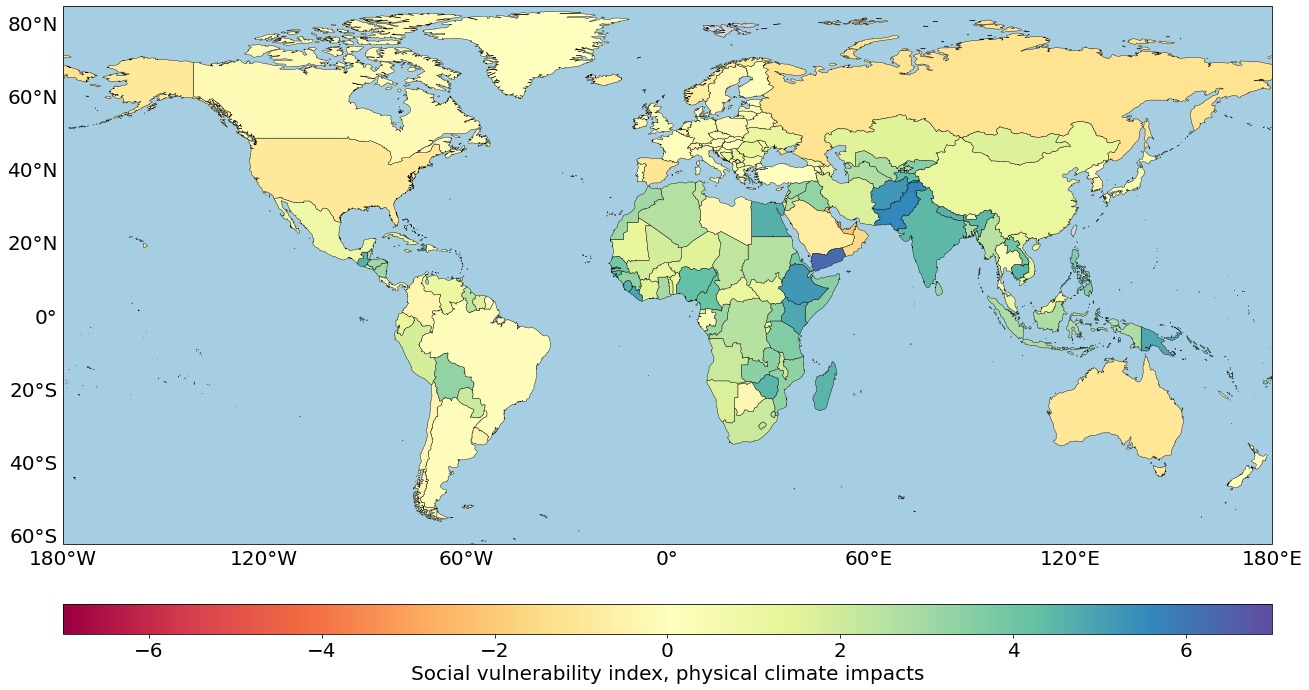

min: -4.606688166265572, max: 6.865553401384204


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Social vulnerability index, physical climate impacts)
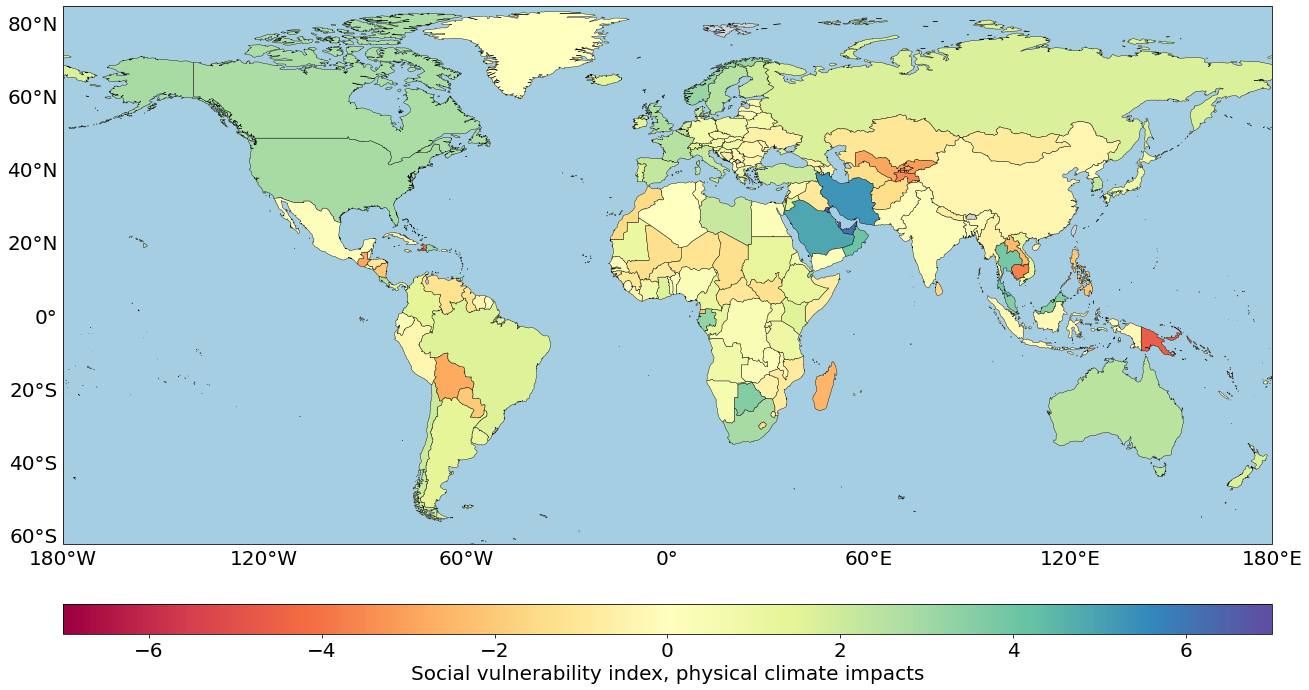

In [18]:
# Mapas

# Cambio de exposición, origen
vn = df_orig.columns[-6]
borders[vn] = df_orig[vn]
borders.loc[["MHL"], vn] = np.nan
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = -7
max = 7
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "spectral", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Cambio de exposición, destino
vn = df_dest.columns[-6]
borders[vn] = df_dest[vn]
borders.loc[["MHL", "BTN", "MDV"], vn] = np.nan
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
#print(borders[vn].sort_values().dropna().to_string())
min = -7
max = 7
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "spectral", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

In [19]:
# Resumen por países, origen
disp = display(df_orig, df_orig.columns[-7],
    var_i = list(df_orig.columns[-6:]), p = False, type = "index",
    add = [True] + [False] * 6, format = ["{:,.0f}"] + ["{:,.1f}"]*6)
disp

Most vulnerable countries: Pakistan, Venezuela (Bolivarian Republic of), India, China, Bangladesh
Most vulnerable SIDS: Haiti, Dominican Republic, Puerto Rico, Cuba, Jamaica
Most vulnerable LDC: Bangladesh, South Sudan, Myanmar, Afghanistan, Nepal
Most vulnerable LLDC: South Sudan, Afghanistan, Kazakhstan, Nepal, Uzbekistan


,Name,Emigrants,"Social vulnerability index, physical climate impacts",Life expectancy at birth index,"log GNI per capita, PPP index",Gender Development index index,% rural population index,% population below 15 or above 65 years old index
0,Pakistan,"5,695,009",5.6,4.8,5.4,4.7,5.7,5.1
1,Venezuela (Bolivarian Republic of),"4,152,554",1.1,1.9,2.7,-1.4,-1.1,2.8
2,India,"4,066,864",4.4,4.8,5.3,5.5,6.1,-1.4
3,China,"2,149,366",1.1,1.1,2.4,1.4,2.9,-2.6
4,Bangladesh,"1,995,753",2.8,1.4,4.4,2.8,4.6,-0.3
5,South Sudan,"1,856,705",1.3,1.8,1.5,1.1,0.9,0.5
6,SIDS,"1,980,089",1.3,1.8,2.2,0.5,2.1,-0.6
7,LDC,"11,916,969",3.1,3.0,3.9,2.6,2.8,1.9
8,LLDC,"8,602,367",2.3,1.7,2.7,1.6,3.1,1.4
9,Asia,"27,133,806",1.4,1.1,2.0,1.6,1.9,-0.2


In [20]:
# Países con mayor mejoría en exposición, origen
df_orig[ ["name"] + list(df_orig.columns[-7:]) ].sort_values(
    df_orig.columns[-6], ascending = False ).head(10).style.format(
    dict(zip(df_orig.columns[-7:], ["{:,.0f}"] + ["{:,.1f}"]*6)) )

,name,Emigrants,"Social vulnerability index, physical climate impacts",Life expectancy at birth index,"log GNI per capita, PPP index",Gender Development index index,% rural population index,% population below 15 or above 65 years old index
ISO_A3,,,,,,,,
YEM,Yemen,"269,874",6.3,5.4,7.9,4.6,5.9,5.2
PAK,Pakistan,"5,695,009",5.6,4.8,5.4,4.7,5.7,5.1
AFG,Afghanistan,"794,917",5.2,4.8,5.6,2.4,5.4,5.8
ETH,Ethiopia,"134,045",5.2,4.5,6.4,3.4,6.6,3.0
GMB,Gambia,"58,680",5.0,6.8,7.5,2.8,2.1,3.6
LBR,Liberia,"100,057",5.0,4.7,6.8,5.4,3.2,2.5
PNG,Papua New Guinea,208,4.9,5.7,5.6,2.7,7.3,1.0
WSM,Samoa,"22,350",4.9,3.3,5.9,2.0,7.7,3.3
KEN,Kenya,"265,329",4.8,6.0,5.5,2.9,6.1,1.7


In [21]:
# Resumen por países, destino
disp = display(df_dest, df_dest.columns[-7],
    var_i = list(df_dest.columns[-6:]), p = False, type = "index",
    add = [True] + [False] * 6, format = ["{:,.0f}"] + ["{:,.1f}"]*6)
disp

Most vulnerable countries: United States of America, Germany, United Kingdom of Great Britain and Northern Ireland, Saudi Arabia, Russian Federation
Most vulnerable SIDS: Singapore, Dominican Republic, Papua New Guinea, Maldives, Puerto Rico
Most vulnerable LDC: Uganda, Sudan, Bangladesh, Ethiopia, Congo, Democratic Republic of the
Most vulnerable LLDC: Uganda, Kazakhstan, Ethiopia, Chad, South Sudan


,Name,Immigrants,"Social vulnerability index, physical climate impacts",Life expectancy at birth index,"log GNI per capita, PPP index",Gender Development index index,% rural population index,% population below 15 or above 65 years old index
0,United States of America,"10,282,761",2.9,2.5,4.5,4.1,2.9,-0.9
1,Germany,"3,679,840",0.7,1.7,2.4,-0.7,1.5,-1.7
2,United Kingdom of Great Britain and Northern Ireland,"2,857,616",2.8,3.8,3.4,2.1,4.3,-0.9
3,Saudi Arabia,"2,748,848",4.9,4.1,5.8,1.5,6.1,4.9
4,Russian Federation,"2,358,910",1.7,-0.6,1.8,2.3,2.1,2.3
5,Canada,"2,275,029",2.8,3.4,3.2,3.4,3.1,-0.2
6,SIDS,"941,127",-0.0,-0.3,-0.3,0.6,-0.6,0.4
7,LDC,"4,654,270",-0.5,-0.3,-0.8,-0.4,-0.5,-0.4
8,LLDC,"3,208,739",-0.8,-0.5,-0.9,-0.1,-1.4,-0.6
9,Asia,"15,826,709",0.8,1.0,0.8,0.6,0.9,0.4


In [22]:
# Resumen por países, destino
df_dest[ ["name"] + list(df_dest.columns[-7:]) ].sort_values(
    df_dest.columns[-6], ascending = False ).head(10).style.format(
    dict(zip(df_dest.columns[-7:], ["{:,.0f}"] + ["{:,.1f}"]*6)) )

,name,Immigrants,"Social vulnerability index, physical climate impacts",Life expectancy at birth index,"log GNI per capita, PPP index",Gender Development index index,% rural population index,% population below 15 or above 65 years old index
ISO_A3,,,,,,,,
QAT,Qatar,"623,716",6.9,4.3,6.5,7.9,7.9,4.8
KWT,Kuwait,"692,845",6.7,4.7,5.7,7.8,7.5,4.8
ARE,United Arab Emirates,"1,678,210",6.2,4.6,6.4,5.6,6.4,5.2
IRN,Iran (Islamic Republic of),"425,385",5.3,4.7,4.9,1.2,5.9,7.5
BHR,Bahrain,"187,984",5.0,4.4,5.2,1.9,6.6,4.9
SAU,Saudi Arabia,"2,748,848",4.9,4.1,5.8,1.5,6.1,4.9
SGP,Singapore,"467,839",4.7,4.5,4.8,4.3,5.3,2.8
OMN,Oman,"418,239",4.1,2.3,4.1,2.1,6.5,3.6
THA,Thailand,"740,913",3.9,4.8,3.4,5.9,2.1,1.4
